In [2]:
# importing libraries
import pandas as pd
import scipy
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt


# Load Data

In [3]:
# Load the dataset
df = pd.read_csv('hotel_bookings_data.csv')
df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


In [4]:
# Mengecek Datatype tiap kolom berserta non-null kolom
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
# Melihat data null
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

In [6]:
df.duplicated().sum()

33261

# Data Preprocessing

## Data Cleansing

In [7]:
df1 = df.copy()


## Null Value

In [8]:
# Imputasi fitur kategorik yang memiliki nilai NULL/NaN
df1['company'] = df1['company'].fillna(0)
df1['agent'] = df1['agent'].fillna(0)
df1['children'] = df1['children'].fillna(0)
df1['city'] = df1['city'].fillna('unknown')               
     

In [9]:
# Mengecek keberadaan null value di tiap fitur
print(df1.isnull().sum())

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

sudah tidak ada lagi data null/nan yang berada di dataset kita

## Replace Values

In [10]:
# melihat unique pada meal
df1['meal'].unique()

array(['Breakfast', 'Full Board', 'Dinner', 'No Meal', 'Undefined'],
      dtype=object)

In [11]:
# replace value
df1 = df1.replace({'meal': {'Undefined':'No Meal'}})
df1['meal'].value_counts()

Breakfast     92310
Dinner        14463
No Meal       11819
Full Board      798
Name: meal, dtype: int64

## Data Type

* is_repeated_guest                ubah ke bool karena dia yes/no


In [12]:
df1[['is_repeated_guest']] = df1[['is_repeated_guest']].astype('bool')
df1[['children']] = df1[['children']].astype('int64')

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  int64  
 11  babies                          119390 non-null  int64  
 12  meal            

## Membuang data yang tidak diperlukan

#### Membuat kolom baru agar lebih efesien 

* karena children, babies termasuk pengunjung tidak ada bedanya (mungkin dari segi harga) maka akan dinamakan total_visitors 
* karena weekend dan weekdays sama aja untuk menghitung total harian menginap maka akan diganti menjadi total_hari_menginap
* karena total harian menginap belum menghitung keseluruhan jumlah pengunjung dengan seseorang yang mengcancel pesanan, maka kita buat fix_menginap


In [14]:
df1['total_visitors'] = df1['adults'] + df1['children'] + df1['babies']
df1['total_harian_menginap'] = df1['stays_in_weekend_nights'] + df1['stays_in_weekdays_nights']

#### Menghapus data yang tidak diperlukan 

In [15]:
(df1['total_visitors'] == 0).sum()


180

* kita akan menghapus total visitor yg memiliki jumlah 0 

In [16]:
df1 = df1[(df1['total_visitors'] > 0)]
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119210 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119210 non-null  object 
 1   is_canceled                     119210 non-null  int64  
 2   lead_time                       119210 non-null  int64  
 3   arrival_date_year               119210 non-null  int64  
 4   arrival_date_month              119210 non-null  object 
 5   arrival_date_week_number        119210 non-null  int64  
 6   arrival_date_day_of_month       119210 non-null  int64  
 7   stays_in_weekend_nights         119210 non-null  int64  
 8   stays_in_weekdays_nights        119210 non-null  int64  
 9   adults                          119210 non-null  int64  
 10  children                        119210 non-null  int64  
 11  babies                          119210 non-null  int64  
 12  meal            

# Monthly Hotel Booking Analysis Based on Hotel Type

## perbandingan jumlah pemesanan hotel setiap bulannya berdasarkan jenis hotel 

In [17]:
df['reservation_status'].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [18]:
# reservation_status 
df1['total_pemesanan_hotel'] = df1['reservation_status'].apply(lambda x: 1 if x == 'Check-Out' and 'No-Show' else 0)
df1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_visitors,total_harian_menginap,total_pemesanan_hotel
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,0.0,0,Personal,0.0,0,0,Check-Out,2,0,1
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,0.0,0,Personal,0.0,0,0,Check-Out,2,0,1
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0.0,0,Personal,75.0,0,0,Check-Out,1,1,1
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0.0,0,Personal,75.0,0,0,Check-Out,1,1,1
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0.0,0,Personal,98.0,0,1,Check-Out,2,2,1


In [19]:
avg_order_month = df1.groupby(['hotel','arrival_date_month']).agg({'total_pemesanan_hotel' : 'count',
                                                                   'arrival_date_year' : 'nunique'}).reset_index()
avg_order_month

,hotel,arrival_date_month,total_pemesanan_hotel,arrival_date_year
0,City Hotel,April,4950,2
1,City Hotel,August,7885,2
2,City Hotel,December,7594,2
3,City Hotel,February,4114,2
4,City Hotel,January,4336,2
5,City Hotel,July,8221,2
6,City Hotel,June,7469,2
7,City Hotel,March,3730,2
8,City Hotel,May,6434,2
9,City Hotel,November,7392,2


## Lakukan normalisasi data 

karna pada data tersebut bulan oktober dan september memiliki 3 tahun, maka kita akan menormalisasikan bulan tersebut

In [20]:
avg_order_month['rata2_pemesanan_hotel'] = avg_order_month['total_pemesanan_hotel'] / avg_order_month['arrival_date_year']
avg_order_month

,hotel,arrival_date_month,total_pemesanan_hotel,arrival_date_year,rata2_pemesanan_hotel
0,City Hotel,April,4950,2,2475.000000
1,City Hotel,August,7885,2,3942.500000
2,City Hotel,December,7594,2,3797.000000
3,City Hotel,February,4114,2,2057.000000
4,City Hotel,January,4336,2,2168.000000
5,City Hotel,July,8221,2,4110.500000
6,City Hotel,June,7469,2,3734.500000
7,City Hotel,March,3730,2,1865.000000
8,City Hotel,May,6434,2,3217.000000
9,City Hotel,November,7392,2,3696.000000


## Urutkan data berdasarkan bulan

In [21]:
# pyhton akan mengurutkan nama sesuai abjad jadinya kita ubah saja menjadi nomor agar terurut
avg_order_month =  avg_order_month.replace({'arrival_date_month': {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 
                                                                   'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}})

## Buatlah plot yang dapat menunjukan perubahan kenaikan maupun penurunan dari jumlah pemesanan hotel setiap bulannya berdasarkan jenis hotel

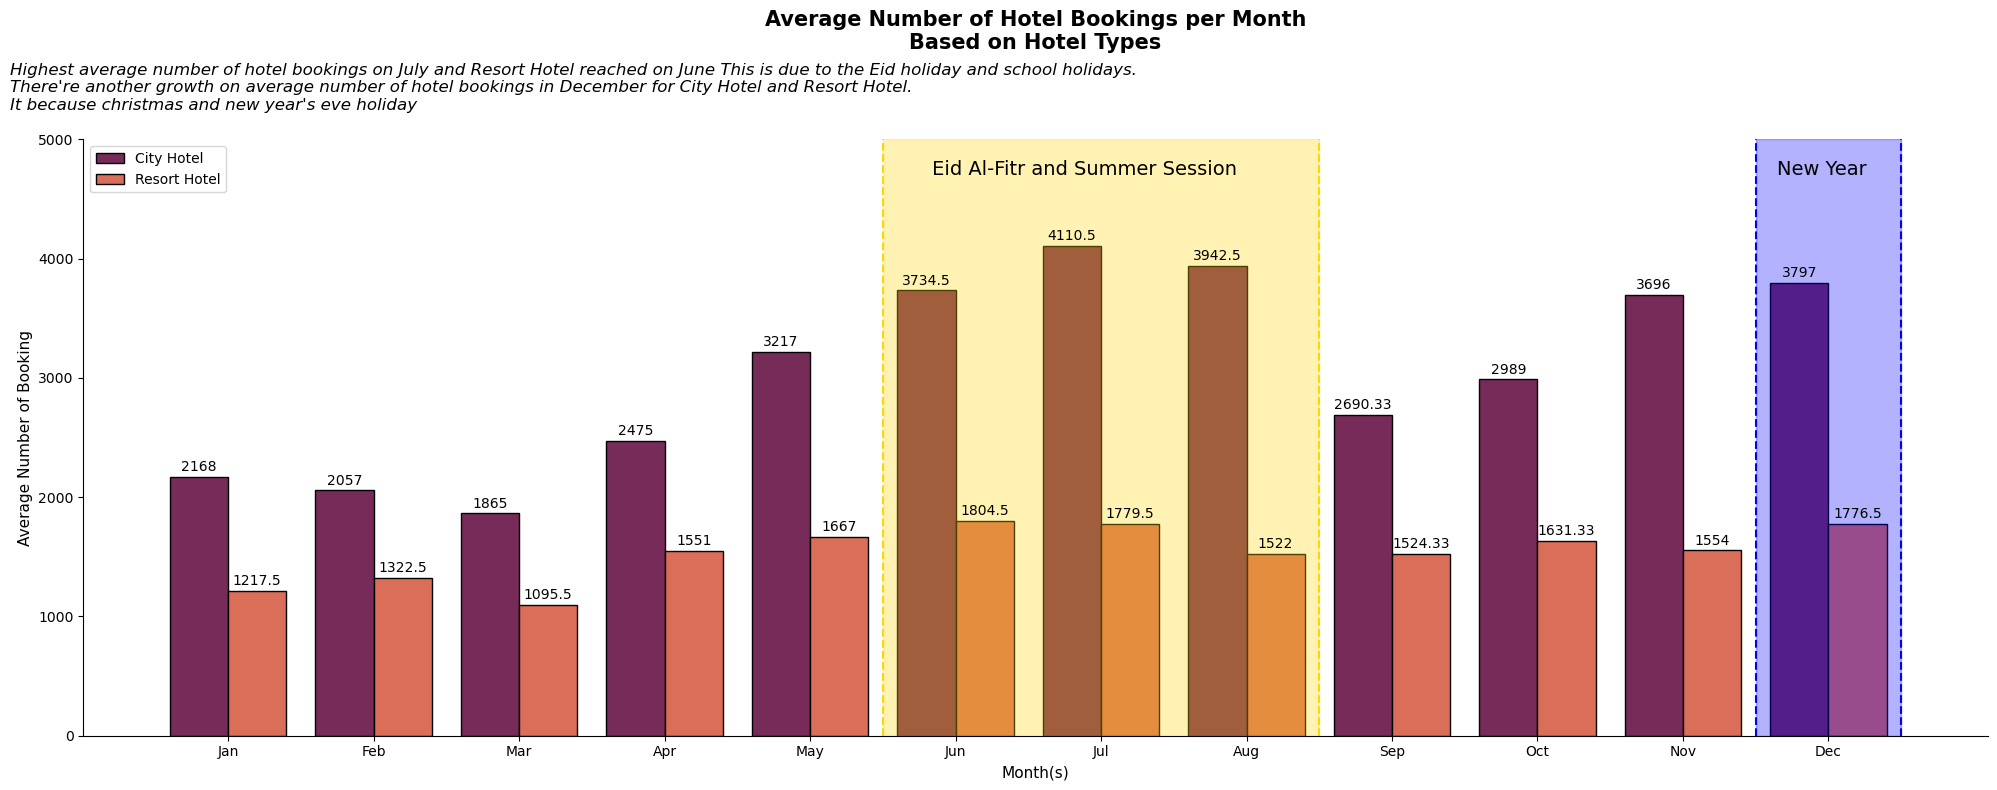

In [22]:
fig, ax = plt.subplots(figsize=(20, 8))
plt.title("Average Number of Hotel Bookings per Month\nBased on Hotel Types", fontsize=15, color='black', weight='bold', pad=65)
plt.text(x=-1.5, y=5250,
         s="Highest average number of hotel bookings on July and Resort Hotel reached on June This is due to the Eid holiday and school holidays.\nThere're another growth on average number of hotel bookings in December for City Hotel and Resort Hotel.\nIt because christmas and new year's eve holiday",
         fontsize=12, fontstyle='italic')
sns.barplot(x='arrival_date_month', y='rata2_pemesanan_hotel', data=avg_order_month, hue='hotel', edgecolor='black', palette='rocket')

plt.xlabel('Month(s)', fontsize=11)
plt.ylabel('Average Number of Booking', fontsize=11)
plt.ylim(0, 5000)
plt.xticks(np.arange(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])


plt.bar_label(ax.containers[0], padding=2)
plt.bar_label(ax.containers[1], padding=2)

plt.axvline(4.5, ls='--', color='gold')
plt.axvline(7.5, ls='--', color='gold')
plt.stackplot(np.arange(4.5,8.5), [[5000]], color='gold', alpha=0.3)
plt.text(x=4.8, y=4750, s=' Eid Al-Fitr and Summer Session', fontsize=14, color='black', va='center')

plt.axvline(10.5, ls='--', color='blue')
plt.axvline(11.5, ls='--', color='blue')
plt.stackplot(np.arange(10.5,12), [[5000]], color='blue', alpha=0.3)
plt.text(x=10.65, y=4750, s='New Year', fontsize=14, color='black', va='center')
ax.legend(loc=2)

sns.despine()
plt.tight_layout()

# Impact Analysis of Stay Duration on Hotel Bookings Cancellation Rates

### Buat kolom baru yang berisi total durasi menginap.

 diatas sudah dibuat dengan nama "total_harian_menginap"

### Kelompokkan nilai-nilai dari kolom baru pada langkah sebelumnya supaya lebih signifikan 

In [23]:
def kelompok_menginap(x):
    if x['total_harian_menginap'] >= 22:
        kelompok = '4 Minggu'
    elif x['total_harian_menginap'] >= 15:
        kelompok = '3 Minggu'
    elif x['total_harian_menginap'] >= 8:
        kelompok = '2 Minggu'
    else: 
        kelompok  = '1 Minggu'
    return kelompok  

df1['grup_menginap'] = df1.apply(lambda x: kelompok_menginap(x), axis=1)

### Membuat tabel agregat yang menunjukan perbandingan jumlah pemesanan hotel yang dibatalkan terhadap durasi menginap untuk setiap jenis hotel

In [24]:
df1_avg = df1.groupby(['hotel','grup_menginap']).agg({'reservation_status' : 'count', 
                                                      'is_canceled' : 'sum'}).reset_index()
df1_avg.rename(columns={'reservation_status' : 'jumlah_total_pemesanan'}, inplace=True)
df1_avg

,hotel,grup_menginap,jumlah_total_pemesanan,is_canceled
0,City Hotel,1 Minggu,77942,32404
1,City Hotel,2 Minggu,1069,558
2,City Hotel,3 Minggu,105,76
3,City Hotel,4 Minggu,47,41
4,Resort Hotel,1 Minggu,36042,9917
5,Resort Hotel,2 Minggu,3728,1078
6,Resort Hotel,3 Minggu,169,79
7,Resort Hotel,4 Minggu,108,46


### Buatlah plot yang dapat menunjukan rasio pembatalan pesanan terhadap durasi menginap untuk setiap tipe hotel

In [25]:
# ['Cancellation_Rate'] = (Jumlah Pemesanan Dibatalkan / Jumlah Total Pemesanan) * 100
df1_avg['cancellation_rate'] = round((df1_avg['is_canceled']/df1_avg['jumlah_total_pemesanan'])*100, 2)
df1_avg

,hotel,grup_menginap,jumlah_total_pemesanan,is_canceled,cancellation_rate
0,City Hotel,1 Minggu,77942,32404,41.57
1,City Hotel,2 Minggu,1069,558,52.20
2,City Hotel,3 Minggu,105,76,72.38
3,City Hotel,4 Minggu,47,41,87.23
4,Resort Hotel,1 Minggu,36042,9917,27.52
5,Resort Hotel,2 Minggu,3728,1078,28.92
6,Resort Hotel,3 Minggu,169,79,46.75
7,Resort Hotel,4 Minggu,108,46,42.59


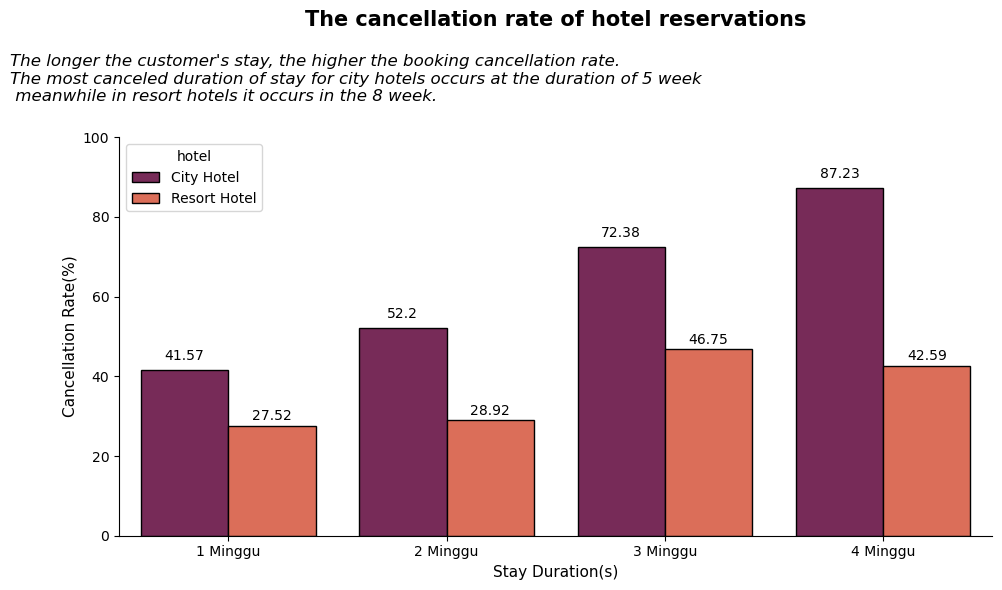

In [27]:
fig, ax = plt.subplots(figsize=(10,6))
plt.title('The cancellation rate of hotel reservations', fontsize=15, color='black', weight='bold', pad=80)
plt.text(x=-1, y=109, s="The longer the customer's stay, the higher the booking cancellation rate.\nThe most canceled duration of stay for city hotels occurs at the duration of 5 week\n meanwhile in resort hotels it occurs in the 8 week.", fontsize=12, fontstyle='italic')
sns.barplot(x='grup_menginap', y='cancellation_rate', data=df1_avg, hue='hotel', edgecolor='black', palette='rocket')

# sns.regplot(x=np.arange(0, len(df_plot[df_plot['hotel'] == 'City Hotel'])), y='cancellation_rate', 
#             data=df_plot[df_plot['hotel'] == 'City Hotel'], scatter=False, label = 'Trend City Hotel', truncate=False)
# sns.regplot(x=np.arange(0, len(df_plot[df_plot['hotel'] == 'City Hotel'])), y='cancellation_rate', 
#             data=df_plot[df_plot['hotel'] == 'Resort Hotel'], scatter=False, label='Trend Resort Hotel', truncate=False)

plt.xlabel('Stay Duration(s)', fontsize=11)
plt.ylabel('Cancellation Rate(%)', fontsize=11)
plt.ylim(0,100)

plt.bar_label(ax.containers[0], padding=5)
plt.bar_label(ax.containers[1], padding=2)

sns.despine()
plt.tight_layout()
plt.savefig('stay_duration.png', dpi=10)

# Impact Analysis of Lead Time on Hotel Bookings Cancellation Rate

Lead time adalah masa tunggu atau jarak waktu pemesanan hotel hingga waktu kedatangan.

## Buatlah kolom baru yang berisi kategorisasi dari kolom jarak waktu pemesanan 

In [30]:
df['lead_time'].max()

737

In [36]:
def jarak_waktu_pemesanan(x):
    if x['lead_time'] > 360:
        quarter = '>4th quarter'
    elif x['lead_time'] > 270:
        quarter = '4th quarter'
    elif x['lead_time'] > 180:
        quarter = '3rd quarter'
    elif x['lead_time'] > 90:
        quarter = '2nd quarter'
    else:
        quarter = '1st quarter'
    return quarter

df1['jwp'] = df1.apply(lambda x: jarak_waktu_pemesanan(x), axis=1)

## Buatlah tabel agregat yang menunjukan perbandingan jumlah pemesanan hotel yang dibatalkan terhadap jarak waktu pemesanan untuk setiap jenis hotel

In [58]:
df1_jwp = df1.groupby(['hotel','jwp']).agg({'reservation_status' : 'count', 
                                                            'is_canceled' : 'sum'}).reset_index()
df1_jwp.rename(columns={'reservation_status' : 'jumlah_total_pemesanan'}, inplace=True)
df1_jwp

,hotel,jwp,jumlah_total_pemesanan,is_canceled
0,City Hotel,1st quarter,44020,13484
1,City Hotel,2nd quarter,18206,8744
2,City Hotel,3rd quarter,8214,4310
3,City Hotel,4th quarter,5859,4467
4,City Hotel,>4th quarter,2864,2074
5,Resort Hotel,1st quarter,24089,4825
6,Resort Hotel,2nd quarter,8214,3075
7,Resort Hotel,3rd quarter,5157,2143
8,Resort Hotel,4th quarter,2036,863
9,Resort Hotel,>4th quarter,551,214


## Buatlah plot yang dapat menunjukan rasio pembatalan pesanan terhadap jarak waktu pemesanan untuk setiap tipe hotel 

In [59]:
# ['Cancellation_Rate'] = (Jumlah Pemesanan Dibatalkan / Jumlah Total Pemesanan) * 100
df1_jwp['cancellation_rate'] = round((df1_jwp['is_canceled']/df1_jwp['jumlah_total_pemesanan'])*100, 2)
df1_jwp

,hotel,jwp,jumlah_total_pemesanan,is_canceled,cancellation_rate
0,City Hotel,1st quarter,44020,13484,30.63
1,City Hotel,2nd quarter,18206,8744,48.03
2,City Hotel,3rd quarter,8214,4310,52.47
3,City Hotel,4th quarter,5859,4467,76.24
4,City Hotel,>4th quarter,2864,2074,72.42
5,Resort Hotel,1st quarter,24089,4825,20.03
6,Resort Hotel,2nd quarter,8214,3075,37.44
7,Resort Hotel,3rd quarter,5157,2143,41.56
8,Resort Hotel,4th quarter,2036,863,42.39
9,Resort Hotel,>4th quarter,551,214,38.84


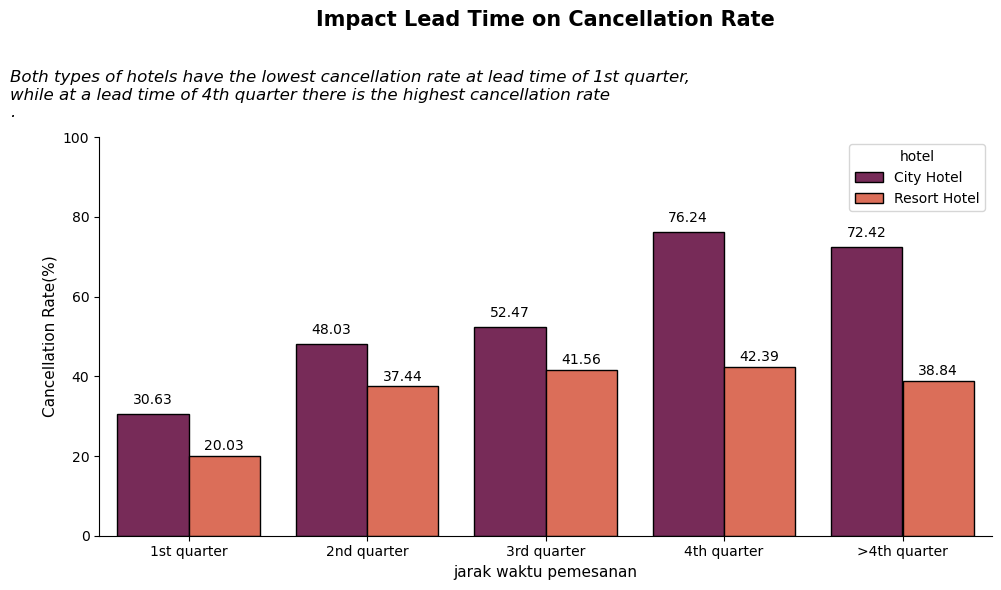

In [63]:
fig, ax = plt.subplots(figsize=(10,6))
plt.title("Impact Lead Time on Cancellation Rate", fontsize=15, color='black', weight='bold', pad=80)
plt.text(x=-1, y=105, s="Both types of hotels have the lowest cancellation rate at lead time of 1st quarter,\nwhile at a lead time of 4th quarter there is the highest cancellation rate\n.", fontsize=12, fontstyle='italic')
sns.barplot(x='jwp', y='cancellation_rate', data=df1_jwp, hue='hotel', edgecolor='black', palette='rocket')

# sns.regplot(x=np.arange(0, len(df_plot[df_plot['hotel'] == 'City Hotel'])), y='cancellation_rate', 
#             data=df_plot[df_plot['hotel'] == 'City Hotel'], scatter=False, label = 'Trend City Hotel', truncate=False)
# sns.regplot(x=np.arange(0, len(df_plot[df_plot['hotel'] == 'City Hotel'])), y='cancellation_rate', 
#             data=df_plot[df_plot['hotel'] == 'Resort Hotel'], scatter=False, label='Trend Resort Hotel', truncate=False)

plt.xlabel('jarak waktu pemesanan', fontsize=11)
plt.ylabel('Cancellation Rate(%)', fontsize=11)
plt.ylim(0,100)

plt.bar_label(ax.containers[0], padding=5)
plt.bar_label(ax.containers[1], padding=2)

sns.despine()
plt.tight_layout()
plt.savefig('stay_duration.png', dpi=10)